목적 : 토픽모델링을 활용해서 유저가 선택할 태그와 실제 사용할 태그 선택하기

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import json
import pandas as pd

plt.rcParams['font.family'] = "AppleGothic"

In [9]:
with open('/Users/hyo-cheolahn/Documents/Projects/Book-Recommendation/data/scraping/all_book_data_ver3.json', "r") as file:
    data = json.load(file)

### stopwords-ko 를 stopwords kiwi에 저장

In [10]:
from kiwipiepy import Kiwi

from kiwipiepy.utils import Stopwords

kiwi = Kiwi(model_type='sbg', typos='basic')
stopwords_from_kiwi = Stopwords()

with open('stopwords-ko.txt', 'r', encoding='utf-8') as file:
    stopwords_add = [line.strip() for line in file]  

stopwords_from_kiwi.add(stopwords_add)

### stopwords-ko 문자열을 형태소와 태그 형태로 새로 저장

In [11]:
# test_sentence = " ".join(stopwords_add)
# print("Test Sentence:", test_sentence)

# # 형태소 분석 수행
# tokens = kiwi.tokenize(test_sentence)

# # 전체 형태소 분석 결과 생성
# analysis_results = []
# for token in tokens:
#     analysis_results.append(f"형태소: {token.form}, 품사: {token.tag}\n")

# # 불용어 제거
# filtered_tokens = [token.form for token in tokens if (token.form, token.tag) not in analysis_results]

# # 결과를 텍스트 파일로 저장
# output_file = "analysis_results.txt"
# with open(output_file, "w", encoding="utf-8") as file:
#     file.writelines(analysis_results)

# print(f"분석 결과가 '{output_file}' 파일로 저장되었습니다.")

### 불용어 리스트를 kiwi가 인식 가능한 형태로 변경해서 txt로 저장
수기로 추가할 형태소: 
- 형태소: 습니다, 품사: EF
- 형태소: 과, 품사: JC

In [12]:
import os
from kiwipiepy import Kiwi

# Kiwi 초기화
kiwi = Kiwi(model_type='sbg', typos='basic')

# 분석 결과 파일 경로
file_path = "analysis_results_added.txt"

# 불용어 리스트 초기화
stopwords = []

# analysis_results.txt 파일 읽기
if os.path.exists(file_path):
    with open(file_path, "r", encoding="utf-8") as file:
        for line in file:
            line = line.strip()
            # 형태소와 품사 파싱
            if line.startswith("형태소:") and ", 품사:" in line:
                parts = line.split(", 품사:")
                form = parts[0].replace("형태소:", "").strip()
                tag = parts[1].strip()
                stopwords.append((form, tag))
else:
    print(f"파일 '{file_path}'이 존재하지 않습니다.")

# 테스트 문장
test_sentence = "가까스로 나는 형태소 분석과 불용어 제거를 테스트하고 있습니다. 그는 안녕하세요~ 먹는 음식이 맛있다."

# 형태소 분석 수행
tokens = kiwi.tokenize(test_sentence)


# 불용어 제거
filtered_tokens = [token.form for token in tokens if (token.form, token.tag) not in stopwords]

# 결과 출력
print("\n불용어 제거 후:")
print(" ".join(filtered_tokens))


불용어 제거 후:
나 형태소 분석 불 용어 제거 테스트 . 안녕하세요 ~ 먹 음식 맛있 .


### 형태소 분석 - 책 소개

In [13]:
df = pd.DataFrame()

texts = []
texts_ds_tokenized = []
for el in data:
    # 여러 줄의 데이터를 정리하여 리스트 생성
    t1 = [x.split(':')[-1].strip() for x in el['description'].split('\n')]

    # 형태소 분석 및 불용어 제거
    t2 = [
        ' '.join(
            [token.form for token in kiwi.tokenize(sentence, stopwords=stopwords_from_kiwi) if (token.form, token.tag) not in stopwords]
        ) for sentence in t1
    ]

    # 원본 텍스트와 처리된 텍스트 추가
    # texts.append(' '.join(t1))
    texts_ds_tokenized.append(' '.join(t2))

# df['texts_ds'] = texts
df['texts_ds_tokenized'] = texts_ds_tokenized
df.head()

,texts_ds_tokenized
0,행복 찾 방법 불행 수비력 기르 58 가지 인생 이야기 cm 다이빙 홈 in 홈 사...
1,감각 지니 디자인 잘 브랜드 만들 섬세 감각 구조 수용 단독 에세이 호 씩 균형 잡...
2,문상훈 새롭 문상훈 얼굴 책 작가 이슬아 133 구독자 보유 유튜브 채널 빠더너스 ...
3,코난 일본어 먹 살 잘 되 샌님 일본어 덕질 기 26 구독자 조회 수 4 천 뷰 기...
4,마지막 기에 충만 삶 죽음 관점 새롭 해석 살 오늘 잘 살 지 이야기 오 죽음 얼마...


In [14]:
output_file = "texts_ds_tokenized.txt"
with open(output_file, "w", encoding="utf-8") as file:
    file.writelines(texts_ds_tokenized)

### 형태소 분석 - 핵심 문장

In [15]:
texts = []
texts_ks_tokenized = []
for el in data:
    # 여러 줄의 데이터를 정리하여 리스트 생성
    t1 = [x.split(':')[-1].strip() for x in el['key_sentences'].split('\n')]

    # 형태소 분석 및 불용어 제거
    t2 = [
        ' '.join(
            [token.form for token in kiwi.tokenize(sentence, stopwords=stopwords_from_kiwi) if (token.form, token.tag) not in stopwords]
        ) for sentence in t1
    ]

    # 원본 텍스트와 처리된 텍스트 추가
    # texts.append(' '.join(t1))
    texts_ks_tokenized.append(' '.join(t2))

# df['texts_ks'] = texts
df['texts_ks_tokenized'] = texts_ks_tokenized
df.head()

,texts_ds_tokenized,texts_ks_tokenized
0,행복 찾 방법 불행 수비력 기르 58 가지 인생 이야기 cm 다이빙 홈 in 홈 사...,그냥 지금 처럼 살 그렇게 살 되 감정 책임지 힘들 날 마음속 온통 감정 가득 터지...
1,감각 지니 디자인 잘 브랜드 만들 섬세 감각 구조 수용 단독 에세이 호 씩 균형 잡...,여러 회사 분야 다양 프로젝트 넘나들 늘 중심 잡 스스로 책임지 결정 마음가짐 디자...
2,문상훈 새롭 문상훈 얼굴 책 작가 이슬아 133 구독자 보유 유튜브 채널 빠더너스 ...,일기장 덮 놓 천장 외로움 기분 눈치 허락 받 ᆫ다니 취향 호 좋아하 정말 거 ᆫ지...
3,코난 일본어 먹 살 잘 되 샌님 일본어 덕질 기 26 구독자 조회 수 4 천 뷰 기...,애니 노력 전혀 이나 들리 다니 공짜 외국어 영역 개척 너무 신기 신 더라고 딱히 ...
4,마지막 기에 충만 삶 죽음 관점 새롭 해석 살 오늘 잘 살 지 이야기 오 죽음 얼마...,웰다잉 편안 행복 잘 살 자 웰빙 편안 행복 잘 죽 정의 삶 죽음 밭 경계선 환자 ...


In [16]:
output_file = "texts_ks_tokenized.txt"
with open(output_file, "w", encoding="utf-8") as file:
    file.writelines(df['texts_ks_tokenized'])

In [29]:
df.to_csv("books_dsks_tokenized.csv", index=False)

print("CSV 파일로 저장되었습니다.")

CSV 파일로 저장되었습니다.


### 두 형태소 데이터프레임 결합

In [17]:

df_combined = df['texts_ds_tokenized'].str.cat(df['texts_ks_tokenized'], sep=' | ')
df_combined.head()

0    행복 찾 방법 불행 수비력 기르 58 가지 인생 이야기 cm 다이빙 홈 in 홈 사...
1    감각 지니 디자인 잘 브랜드 만들 섬세 감각 구조 수용 단독 에세이 호 씩 균형 잡...
2    문상훈 새롭 문상훈 얼굴 책 작가 이슬아 133 구독자 보유 유튜브 채널 빠더너스 ...
3    코난 일본어 먹 살 잘 되 샌님 일본어 덕질 기 26 구독자 조회 수 4 천 뷰 기...
4    마지막 기에 충만 삶 죽음 관점 새롭 해석 살 오늘 잘 살 지 이야기 오 죽음 얼마...
Name: texts_ds_tokenized, dtype: object

### 미리 저장된 df 불러오기

In [18]:
df_read = pd.read_csv('books_dsks_tokenized.csv')
df_combined = df_read['texts_ds_tokenized'].str.cat(df_read['texts_ks_tokenized'], sep=' | ')
df_combined.head()

df_combined = df_combined.fillna('')  # NaN을 빈 문자열로 대체
# df_combined = df_combined.astype(str)  # 모든 데이터를 문자열로 변환
print(df_read.isnull().sum())
df_combined.head()

texts_ds_tokenized    1
texts_ks_tokenized    0
dtype: int64


0    행복 찾 방법 불행 수비력 기르 58 가지 인생 이야기 cm 다이빙 홈 in 홈 사...
1    감각 지니 디자인 잘 브랜드 만들 섬세 감각 구조 수용 단독 에세이 호 씩 균형 잡...
2    문상훈 새롭 문상훈 얼굴 책 작가 이슬아 133 구독자 보유 유튜브 채널 빠더너스 ...
3    코난 일본어 먹 살 잘 되 샌님 일본어 덕질 기 26 구독자 조회 수 4 천 뷰 기...
4    마지막 기에 충만 삶 죽음 관점 새롭 해석 살 오늘 잘 살 지 이야기 오 죽음 얼마...
Name: texts_ds_tokenized, dtype: object

### df 를 사용가능한 형태로 변환

이 코드는 다음 작업을 수행:
- 1.	텍스트 데이터를 Gensim이 분석할 수 있는 형태로 변환.
- 2.	단어와 인덱스 간의 매핑(Dictionary) 생성.
- 3.	극단적인 빈도를 가진 단어 제거 및 최적화.
- 4.	Bag-of-Words 형식으로 텍스트 데이터를 변환.
- 5.	변환된 데이터를 저장하여 나중에 사용할 수 있도록 준비.

In [19]:
import gensim
from gensim import corpora, models

docs=[ d.split() for d in df_combined.to_list()]
dictionary = corpora.Dictionary(docs)
dictionary.filter_extremes(no_below=10,  ## filter_extremes를 통해 outlier를 제거할 수 있음
              no_above=0.7, 
              keep_n=5000)  # 빈도가 높은 토큰으로 sort한 뒤 빈도가 높은 순으로 자름
dictionary.compactify()
dictionary.save('./corpus.dict') 
corpus = [dictionary.doc2bow(doc) for doc in docs]


### 최적 perplexity, coherence 계산

In [19]:
# perplexity, coherence 계산
def lda_model_values(num_topics, corpus, dictionary, texts):
    x = [] # x axis(topics)
    perplexity_values = [] # perplexity values listed by num_topics
    coherence_values = []   # coherence valeus listed by num_topics
    model_list = [] 

    for topic in range(num_topics):
        print("numbers of topics：", topic+1)
        lda_model = models.LdaModel(corpus=corpus, num_topics=topic+1, id2word=dictionary,
                       chunksize=2000, passes=20, iterations=200)  #chunksize: 얼마나 많은 문서가 훈련 시에 사용되는지? passes: 학습 시 전체 코퍼스에서 모델을 학습시키는 빈도 제어
        model_list.append(lda_model)
        x.append(topic+1)
        perplexity_values.append(lda_model.log_perplexity(corpus))
        coherencemodel = models.CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        print(f"Training for LDA_model-Topic_num:{topic+1} is finished.\n")
    return model_list, x, perplexity_values, coherence_values


In [20]:
# import matplotlib.pyplot as plt
# import matplotlib
# from pylab import xticks,yticks,np

# num_topics = 20

# # training models based on range(num_topics)
# model_list, x, perplexity_values, coherence_values = lda_model_values(num_topics, corpus, dictionary, docs) 

# # plotting every perplexity&coherence
# fig = plt.figure(figsize=(15,5))
# # plt.rcParams['font.sans-serif']=['NanumBarunGothic']
# plt.rcParams['font.family'] = "AppleGothic"
# matplotlib.rcParams['axes.unicode_minus'] = False 


# ax1 = fig.add_subplot(1, 2, 1)
# plt.plot(x, perplexity_values, marker="o")
# plt.title("토픽모델링-perplexity")
# plt.xlabel('토픽 규모')
# plt.ylabel('perplexity 규모')
# xticks(np.linspace(1, num_topics, num_topics, endpoint=True)) # interval of x axis labels == 1



# ax2 = fig.add_subplot(1, 2, 2)
# plt.plot(x, coherence_values, marker="o")
# plt.title("토픽모델링-일관성")
# plt.xlabel("토픽수 규모")
# plt.ylabel("일관성 규모")
# xticks(np.linspace(1, num_topics, num_topics, endpoint=True))


# plt.show()

In [20]:
num_topics = 17

### LDA 모델 실행

In [21]:
lda = models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, 
                 num_topics=num_topics, random_state=1, 
                 chunksize = 2000, passes=20, iterations = 400)

In [22]:
for t in lda.show_topics(): print(t)

(5, '0.036*"거" + 0.018*"싶" + 0.014*"마음" + 0.012*"ᆯ" + 0.010*"ᆫ가" + 0.009*"잘" + 0.008*"라고" + 0.008*"ᆯ까" + 0.007*"지금" + 0.006*"오늘"')
(6, '0.016*"문학" + 0.014*"인간" + 0.010*"작가" + 0.009*"시대" + 0.009*"글" + 0.009*"삶" + 0.008*"작품" + 0.008*"세계" + 0.007*"소설" + 0.006*"속"')
(13, '0.078*"사랑" + 0.023*"마음" + 0.012*"상처" + 0.011*"행복" + 0.011*"삶" + 0.011*"이야기" + 0.009*"세상" + 0.009*"순간" + 0.008*"만나" + 0.008*"모든"')
(16, '0.009*"거" + 0.007*"먹" + 0.007*"라고" + 0.007*"고양이" + 0.007*"손" + 0.006*"자" + 0.006*"소리" + 0.006*"눈" + 0.006*"날" + 0.005*"나오"')
(4, '0.034*"여행" + 0.016*"길" + 0.013*"떠나" + 0.012*"사진" + 0.010*"도시" + 0.010*"걷" + 0.008*"만나" + 0.006*"이야기" + 0.006*"싶" + 0.005*"세계"')
(2, '0.044*"시" + 0.028*"시인" + 0.025*"그림" + 0.018*"작가" + 0.014*"글" + 0.014*"그리" + 0.014*"영화" + 0.012*"읽" + 0.012*"이야기" + 0.009*"싶"')
(1, '0.014*"마음" + 0.012*"속" + 0.012*"길" + 0.012*"처럼" + 0.010*"삶" + 0.007*"세상" + 0.007*"눈" + 0.007*"소리" + 0.006*"바람" + 0.006*"하늘"')
(14, '0.011*"한국" + 0.007*"사회" + 0.006*"받" + 0.006*"일본" + 0.006*"이야기" + 0.0

### 시각화 wordcloud

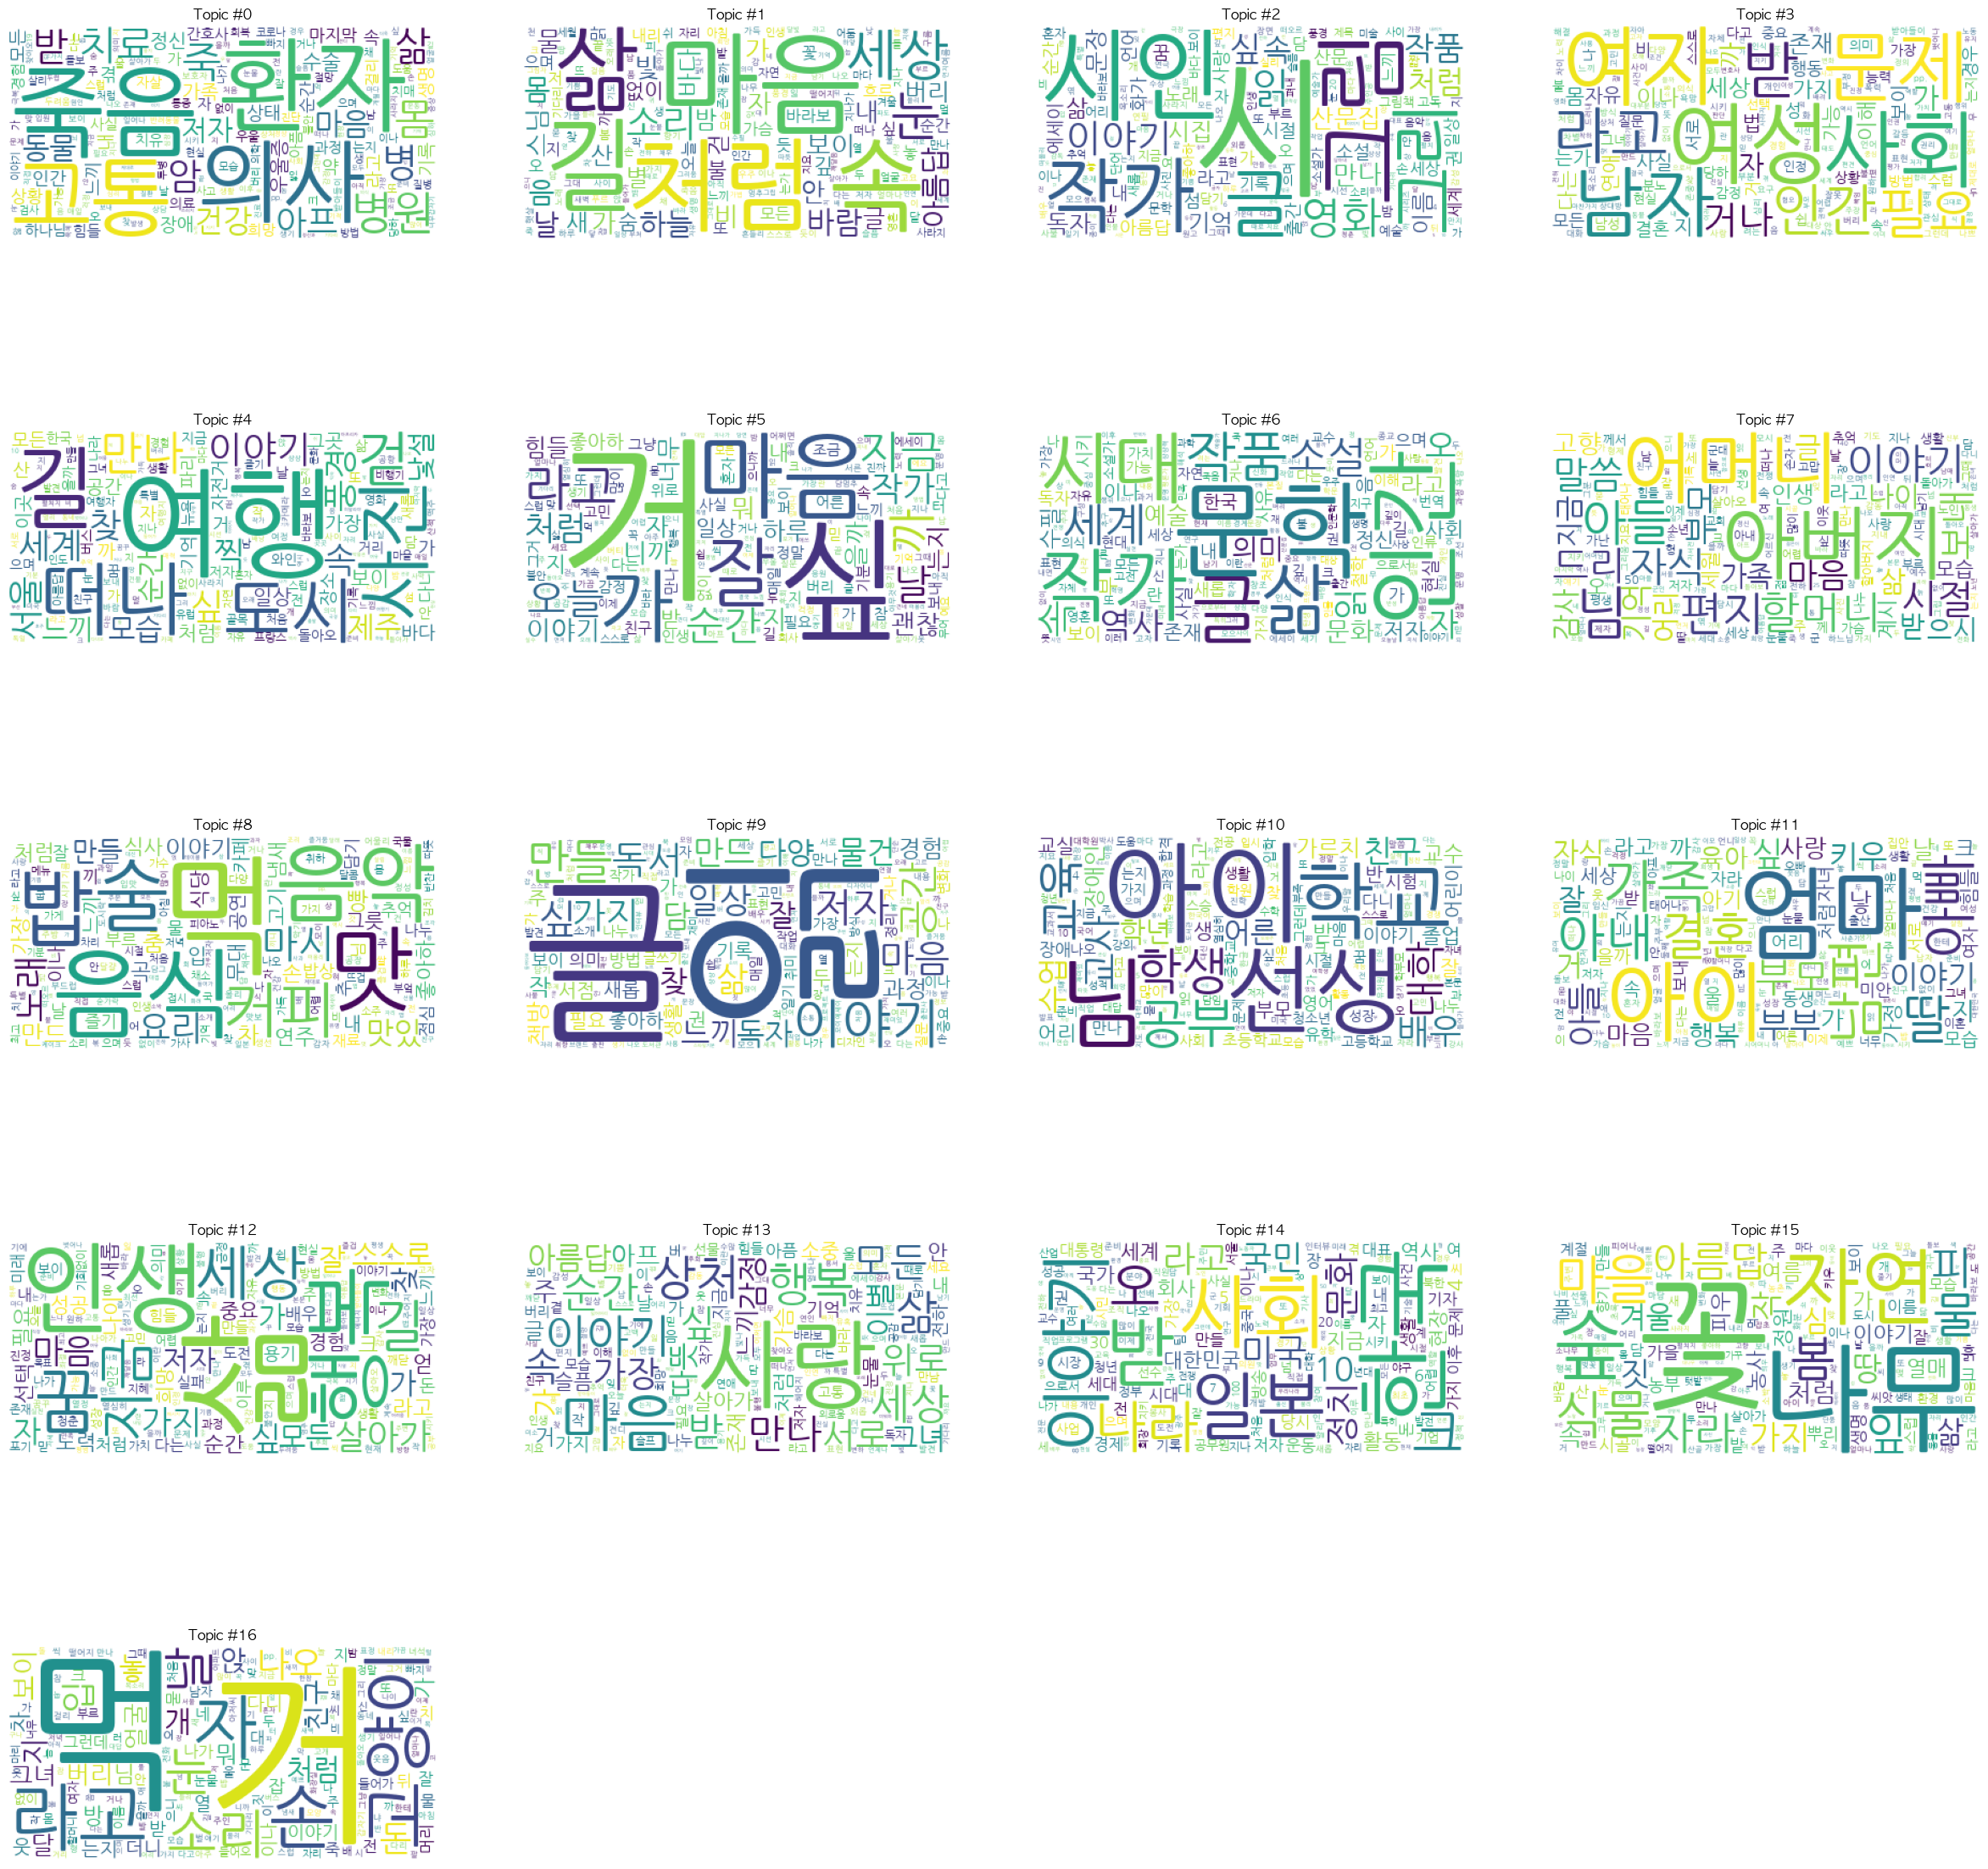

In [24]:
# generate a wordcloud for each topic
from wordcloud import WordCloud 
wc = WordCloud(background_color='white',
        font_path='/Users/hyo-cheolahn/Library/Fonts/NanumGothic-Regular')

plt.figure(figsize=(30,30))
for t in range(lda.num_topics):
    plt.subplot(5,4,t+1)
    x = dict(lda.show_topic(t,200))
    im = wc.generate_from_frequencies(x)
    plt.imshow(im)
    plt.axis("off")
    plt.title("Topic #" + str(t))

### 시각화 pyLDAvis

In [23]:
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim_models.prepare(lda, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.040557  0.001010       1        1  13.891489
12    -0.083124 -0.036982       2        1  10.376676
1      0.052918  0.139879       3        1   9.737353
16     0.115106  0.012844       4        1   9.202053
13     0.033131  0.050713       5        1   6.997529
14    -0.129987 -0.100807       6        1   6.548321
6     -0.200915  0.044744       7        1   5.561361
9     -0.101466  0.017096       8        1   5.198112
4      0.027869  0.088667       9        1   5.075390
3     -0.211386 -0.055898      10        1   5.074931
2      0.024676  0.138353      11        1   3.995852
11     0.170981 -0.132404      12        1   3.661485
0     -0.073016 -0.044825      13        1   3.515803
7      0.162910 -0.093264      14        1   3.287000
15     0.073580  0.094124      15        1   3.184120
10     0.049264 -0.263193      16        1   2.355277
8      0.048901  0.139943      17        1   2.337248, topic_info=     Term          Freq         Total Category  logprob  loglift
152    사랑  35325.000000  35325.000000  Default  30.0000  30.0000
1776   엄마  14846.000000  14846.000000  Default  29.0000  29.0000
1519   아이  18503.000000  18503.000000  Default  28.0000  28.0000
585     먹  14324.000000  14324.000000  Default  27.0000  27.0000
623     시  11966.000000  11966.000000  Default  26.0000  26.0000
...   ...           ...           ...      ...      ...      ...
239   이야기    850.235875  28356.379979  Topic17  -4.9960   0.2491
907     손    679.880653   9488.152252  Topic17  -5.2196   1.1203
291    처럼    679.315933  24930.440542  Topic17  -5.2204   0.1534
2153    입    544.033983   6054.908329  Topic17  -5.4425   1.3466
705    느끼    539.511716  14703.895825  Topic17  -5.4509   0.4510

[1105 rows x 6 columns], token_table=      Topic      Freq Term
term                      
330       1  0.140429   10
330       2  0.097544   10
330       3  0.010091   10
330       4  0.095231   10
330       6  0.262569   10
...     ...       ...  ...
329      12  0.087452   힘들
329      13  0.066040   힘들
329      14  0.065814   힘들
329      15  0.011382   힘들
329      16  0.012509   힘들

[5950 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 13, 2, 17, 14, 15, 7, 10, 5, 4, 3, 12, 1, 8, 16, 11, 9])

In [24]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument  # TaggedDocument는 corpus의 id(=tag)를 함께 넘겨줌
docs=[ d.split() for d in df_combined.to_list()]
tagged_data = [TaggedDocument(d, tags=[str(i)]) for i, d in enumerate(docs)]

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rc

# 한글 폰트 설정 (OS에 따라 폰트 이름 변경)
plt.rcParams['font.family'] = 'AppleGothic'  # MacOS
# plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows
# plt.rcParams['font.family'] = 'NanumGothic'  # Linux

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 한글 테스트
plt.plot([0, 1, 2], [0, 1, 4])
plt.title('한글 테스트')
plt.show()

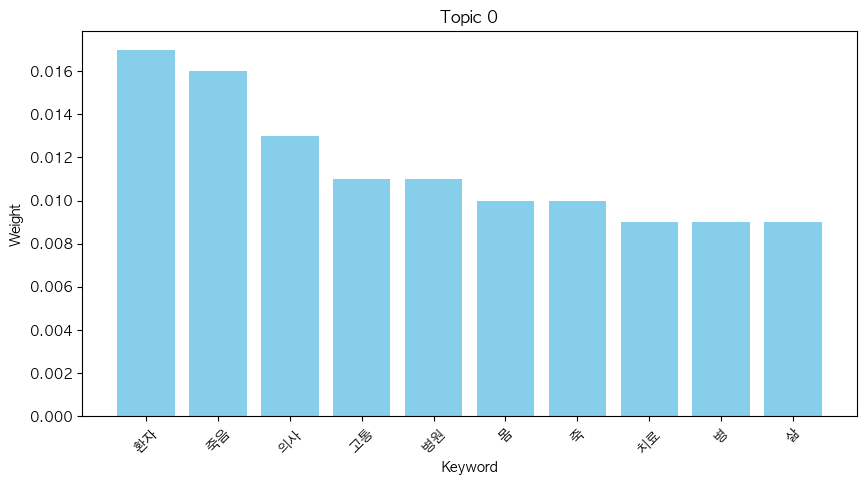

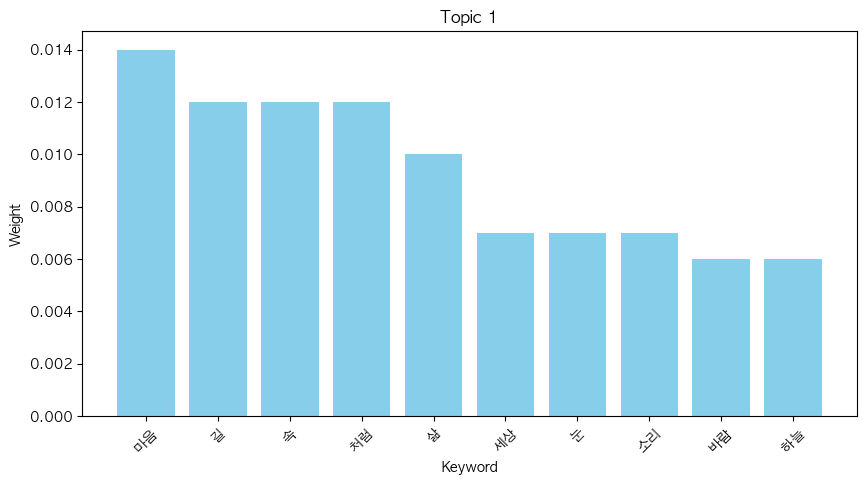

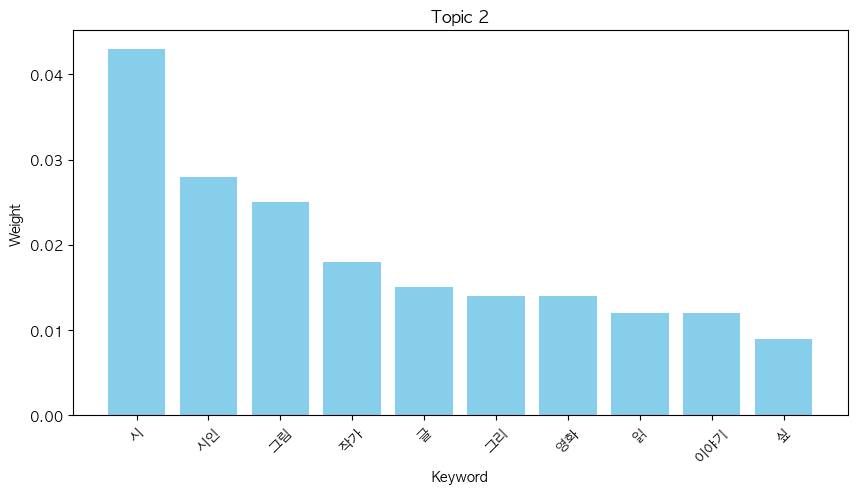

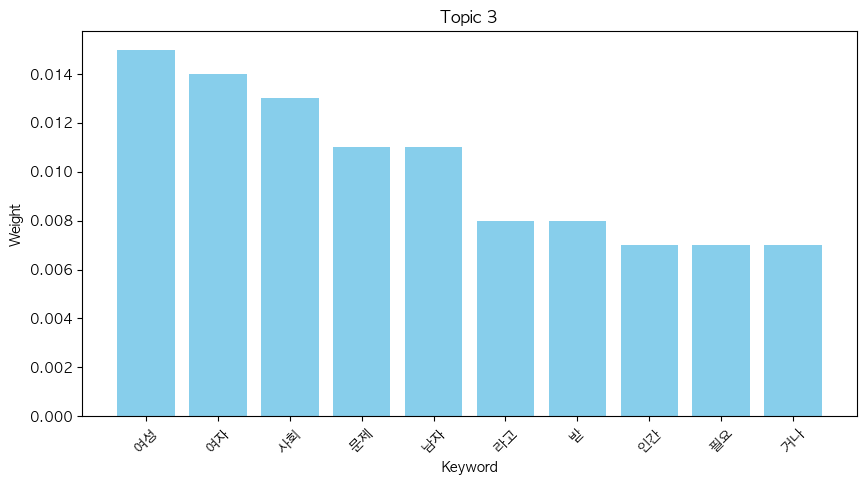

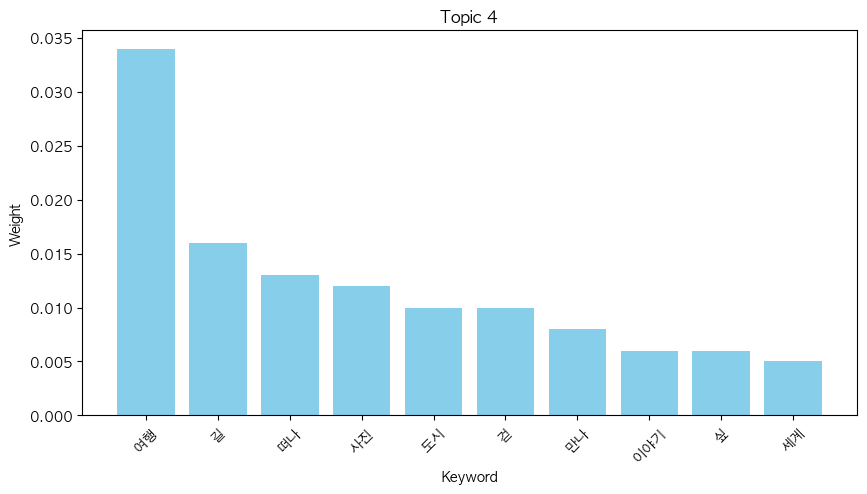

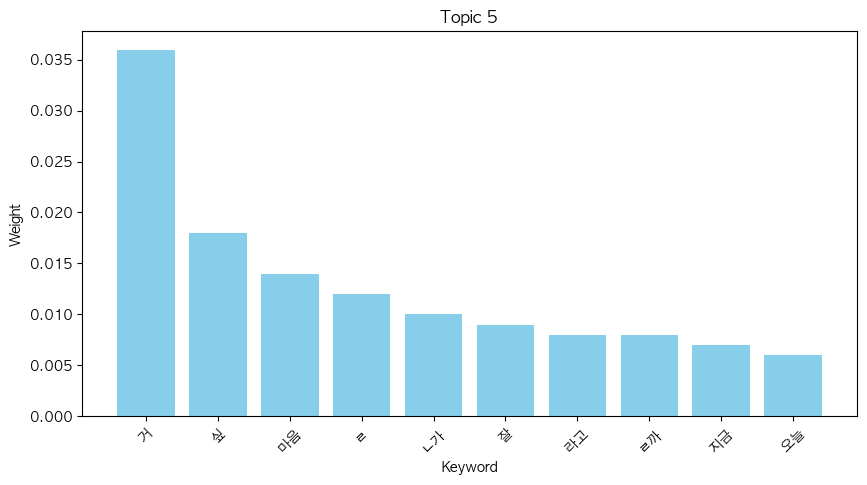

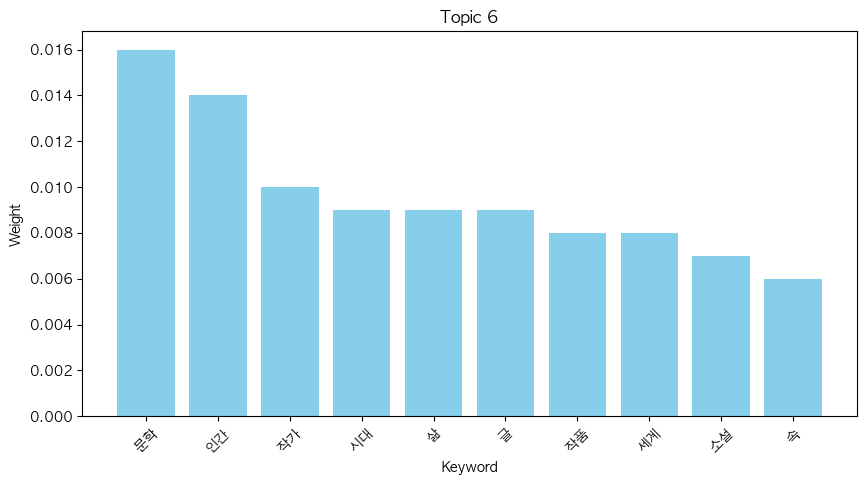

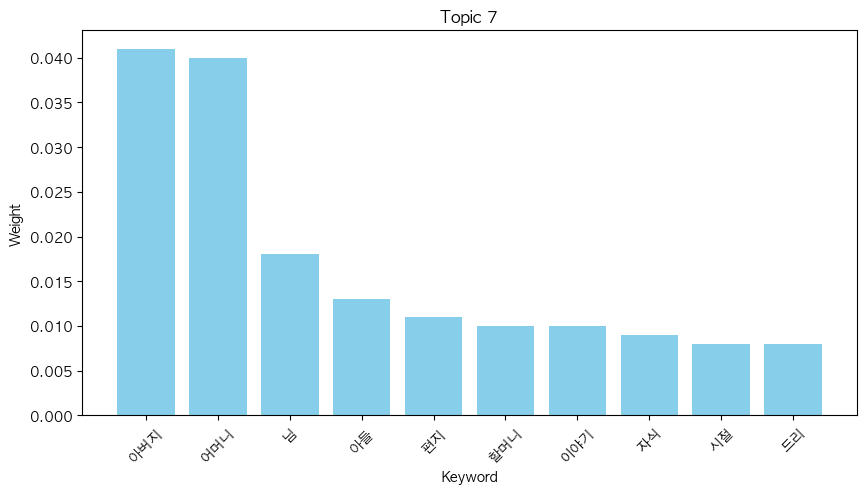

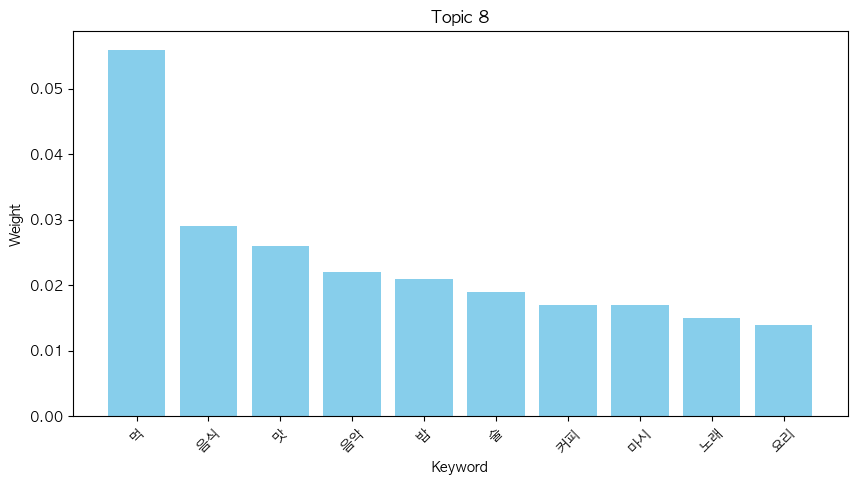

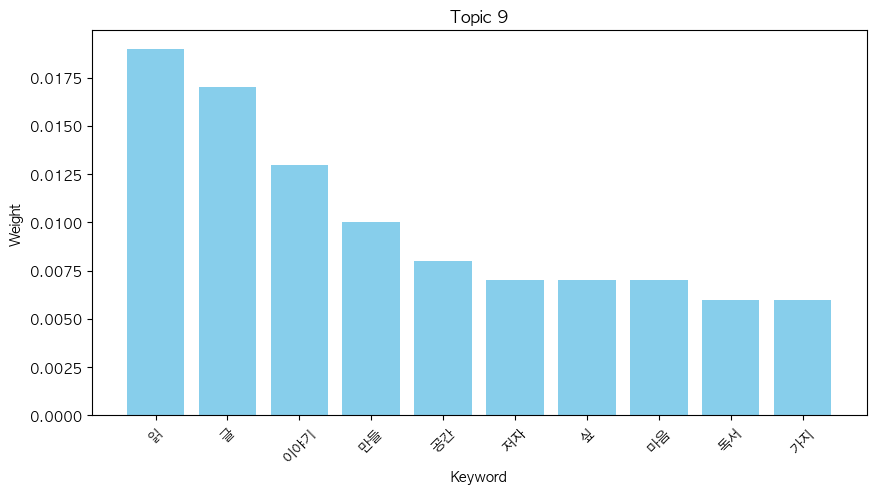

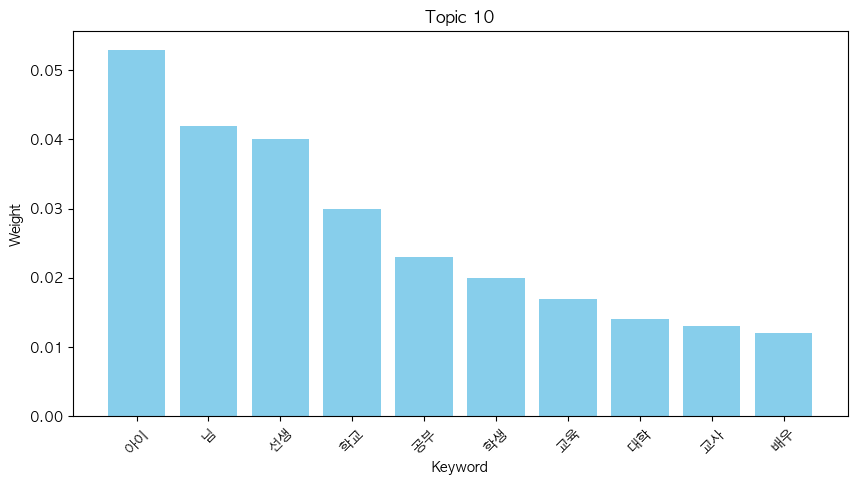

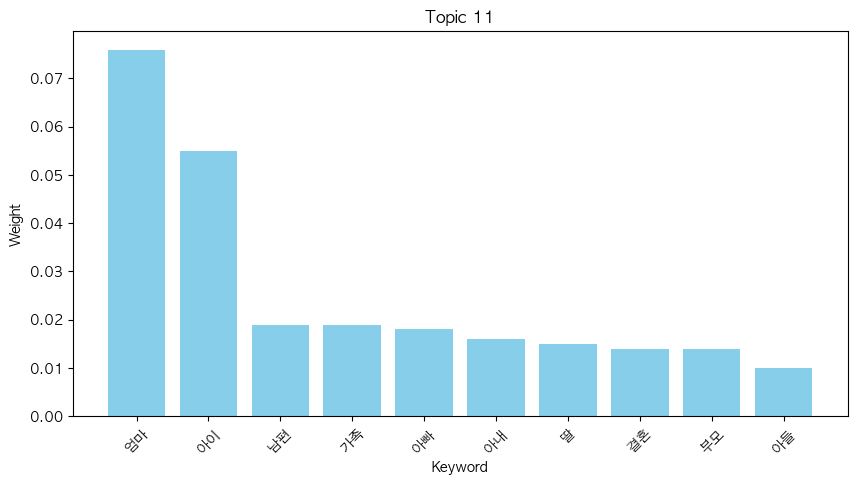

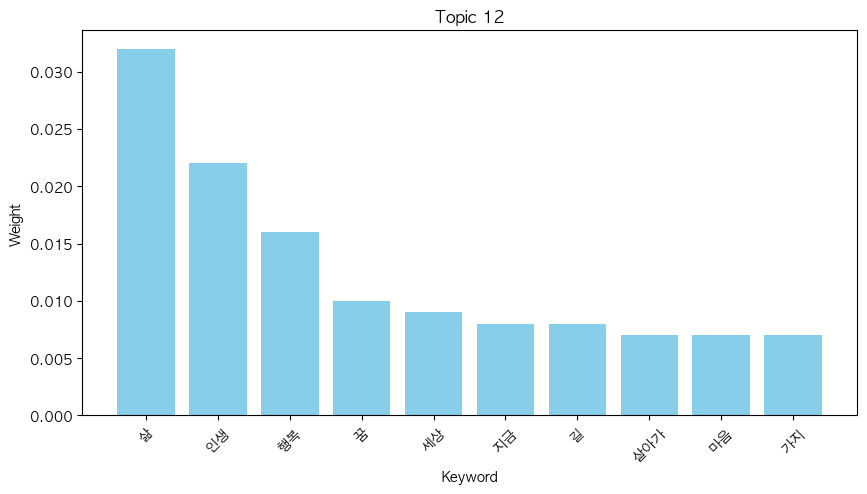

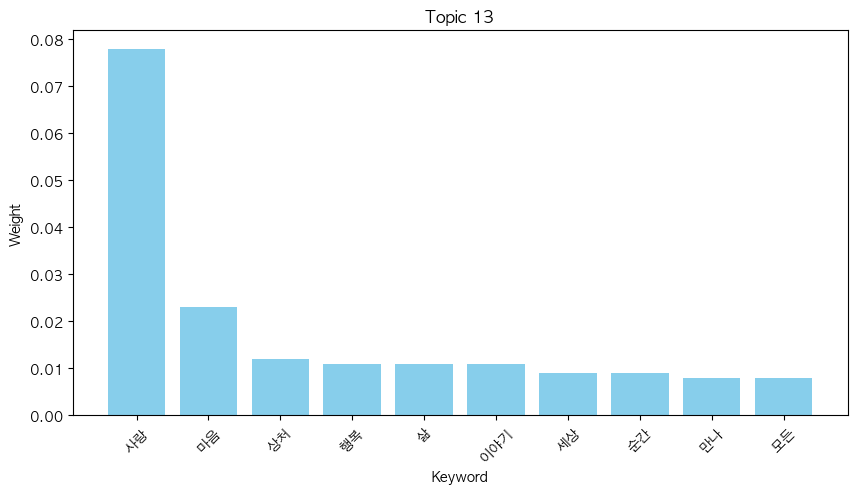

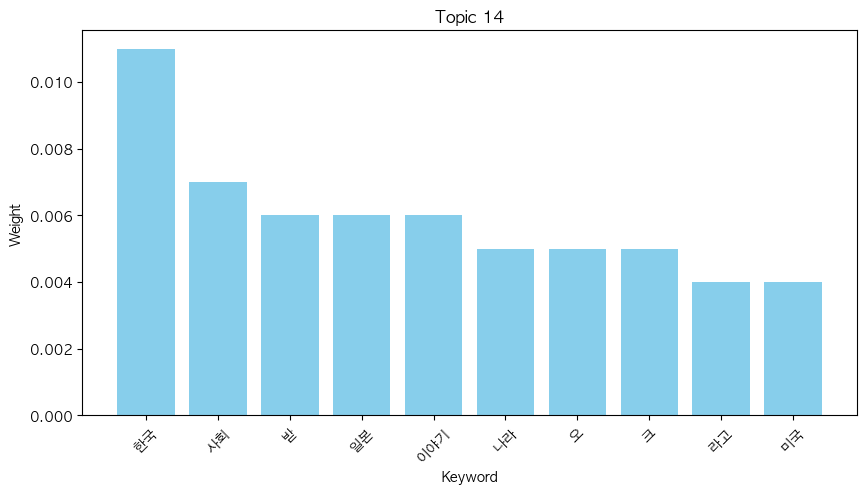

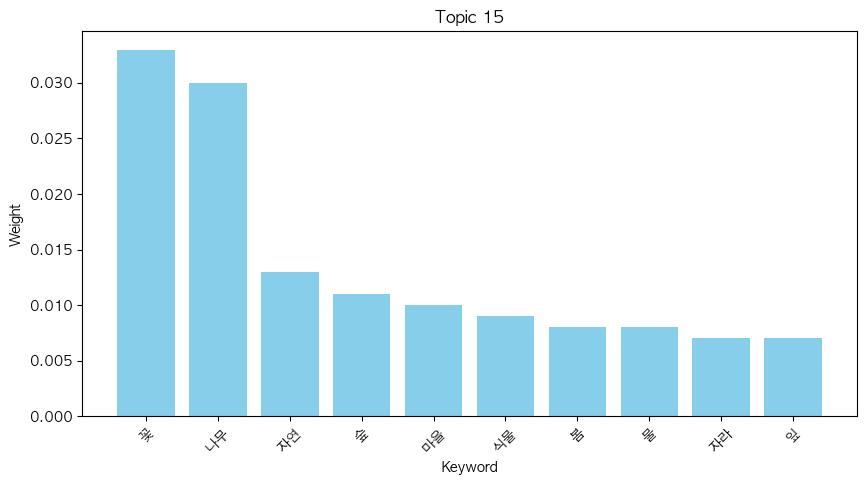

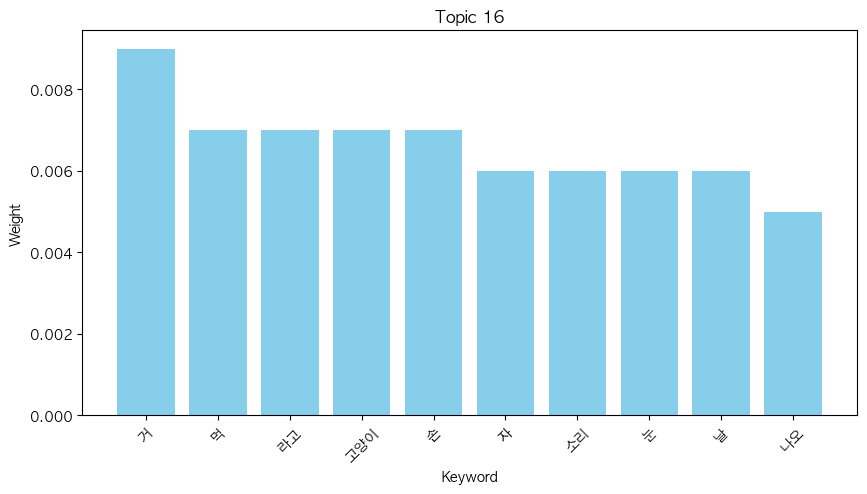

In [27]:
import matplotlib.pyplot as plt

# 토픽 데이터를 처리
topics =[(0, '0.017*"환자" + 0.016*"죽음" + 0.013*"의사" + 0.011*"고통" + 0.011*"병원" + 0.010*"몸" + 0.010*"죽" + 0.009*"치료" + 0.009*"병" + 0.009*"삶"'), (1, '0.014*"마음" + 0.012*"길" + 0.012*"속" + 0.012*"처럼" + 0.010*"삶" + 0.007*"세상" + 0.007*"눈" + 0.007*"소리" + 0.006*"바람" + 0.006*"하늘"'), (2, '0.043*"시" + 0.028*"시인" + 0.025*"그림" + 0.018*"작가" + 0.015*"글" + 0.014*"그리" + 0.014*"영화" + 0.012*"읽" + 0.012*"이야기" + 0.009*"싶"'), (3, '0.015*"여성" + 0.014*"여자" + 0.013*"사회" + 0.011*"문제" + 0.011*"남자" + 0.008*"라고" + 0.008*"받" + 0.007*"인간" + 0.007*"필요" + 0.007*"거나"'), (4, '0.034*"여행" + 0.016*"길" + 0.013*"떠나" + 0.012*"사진" + 0.010*"도시" + 0.010*"걷" + 0.008*"만나" + 0.006*"이야기" + 0.006*"싶" + 0.005*"세계"'), (5, '0.036*"거" + 0.018*"싶" + 0.014*"마음" + 0.012*"ᆯ" + 0.010*"ᆫ가" + 0.009*"잘" + 0.008*"라고" + 0.008*"ᆯ까" + 0.007*"지금" + 0.006*"오늘"'), (6, '0.016*"문학" + 0.014*"인간" + 0.010*"작가" + 0.009*"시대" + 0.009*"삶" + 0.009*"글" + 0.008*"작품" + 0.008*"세계" + 0.007*"소설" + 0.006*"속"'), (7, '0.041*"아버지" + 0.040*"어머니" + 0.018*"님" + 0.013*"아들" + 0.011*"편지" + 0.010*"할머니" + 0.010*"이야기" + 0.009*"자식" + 0.008*"시절" + 0.008*"드리"'), (8, '0.056*"먹" + 0.029*"음식" + 0.026*"맛" + 0.022*"음악" + 0.021*"밥" + 0.019*"술" + 0.017*"커피" + 0.017*"마시" + 0.015*"노래" + 0.014*"요리"'), (9, '0.019*"읽" + 0.017*"글" + 0.013*"이야기" + 0.010*"만들" + 0.008*"공간" + 0.007*"저자" + 0.007*"싶" + 0.007*"마음" + 0.006*"독서" + 0.006*"가지"'), (10, '0.053*"아이" + 0.042*"님" + 0.040*"선생" + 0.030*"학교" + 0.023*"공부" + 0.020*"학생" + 0.017*"교육" + 0.014*"대학" + 0.013*"교사" + 0.012*"배우"'), (11, '0.076*"엄마" + 0.055*"아이" + 0.019*"남편" + 0.019*"가족" + 0.018*"아빠" + 0.016*"아내" + 0.015*"딸" + 0.014*"결혼" + 0.014*"부모" + 0.010*"아들"'), (12, '0.032*"삶" + 0.022*"인생" + 0.016*"행복" + 0.010*"꿈" + 0.009*"세상" + 0.008*"지금" + 0.008*"길" + 0.007*"살아가" + 0.007*"마음" + 0.007*"가지"'), (13, '0.078*"사랑" + 0.023*"마음" + 0.012*"상처" + 0.011*"행복" + 0.011*"삶" + 0.011*"이야기" + 0.009*"세상" + 0.009*"순간" + 0.008*"만나" + 0.008*"모든"'), (14, '0.011*"한국" + 0.007*"사회" + 0.006*"받" + 0.006*"일본" + 0.006*"이야기" + 0.005*"나라" + 0.005*"오" + 0.005*"크" + 0.004*"라고" + 0.004*"미국"'), (15, '0.033*"꽃" + 0.030*"나무" + 0.013*"자연" + 0.011*"숲" + 0.010*"마을" + 0.009*"식물" + 0.008*"봄" + 0.008*"물" + 0.007*"자라" + 0.007*"잎"'), (16, '0.009*"거" + 0.007*"먹" + 0.007*"라고" + 0.007*"고양이" + 0.007*"손" + 0.006*"자" + 0.006*"소리" + 0.006*"눈" + 0.006*"날" + 0.005*"나오"')]


# 토픽 데이터를 시각화
for topic_num, topic in topics:
    words = topic.split(' + ')
    keys = [w.split('*')[1].strip('"') for w in words]
    values = [float(w.split('*')[0]) for w in words]

    plt.figure(figsize=(10, 5))
    plt.bar(keys, values, color='skyblue')
    plt.title(f"Topic {topic_num}")
    plt.ylabel("Weight")
    plt.xlabel("Keyword")
    plt.xticks(rotation=45)
    plt.show()

/var/folders/pv/stmwcx8d7dsf_j4ytc5gp5780000gn/T/ipykernel_9792/974595028.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_keywords = df.groupby('Topic').apply(lambda x: x.nlargest(5, 'Weight')).reset_index(drop=True)


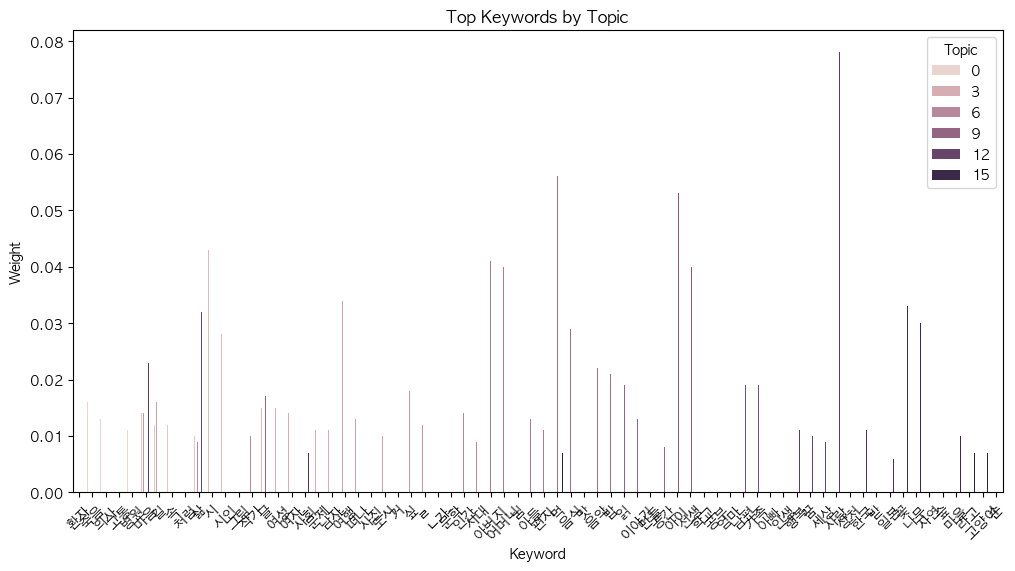

In [32]:
import pandas as pd
import seaborn as sns

# 데이터를 변환하여 키워드 및 가중치 저장
topic_keywords = []
for topic_num, topic in topics:
    words = topic.split(' + ')
    for w in words:
        weight, keyword = w.split('*')
        topic_keywords.append({'Topic': topic_num, 'Keyword': keyword.strip('"'), 'Weight': float(weight)})

df = pd.DataFrame(topic_keywords)

# 토픽별 상위 5개의 키워드 선택
top_keywords = df.groupby('Topic').apply(lambda x: x.nlargest(5, 'Weight')).reset_index(drop=True)

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=top_keywords, x='Keyword', y='Weight', hue='Topic')
plt.xticks(rotation=45)
plt.title("Top Keywords by Topic")
plt.show()